<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [10]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [12]:
import sqlite3
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# 1. Create a connection to the SQLite database named 'survey-data.DB'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-data.db')
# cursor = conn.cursor()

# # 2. Write the DataFrames to the database as a table
# # If the table already exists, it will be replaced
# df.to_sql('survey', conn, if_exists='replace', index=False)

# # 3. Define the query
# query = """select * from survey;"""

# # 4. Execute the query
# cursor.execute(query)
# rows = cursor.fetchall()

# # 5. Extract column names from cursor metadata
# column_names = [description[0] for description in cursor.description]

# # 6. Create a DataFrame for clean display
# survey_df = pd.DataFrame(rows, columns=column_names)
# display(survey_df)

# conn.close()

# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# query = """select * from main;"""
# all_df = pd.read_sql_query(query, conn)

summary_stats = pd.DataFrame({
    "Column name": df.columns.to_list(),
    "DataType": df.dtypes,
    "Number of rows": df.shape[0],
    "Number of columns": df.shape[1],
    "Not-Null Count": df.notnull().sum(),
    "Missing Count": df.isnull().sum(),
    "Missing Percentage": df.isnull().mean() * 100
    #"Unique values": [all_df[col].unique() for col in all_df.columns]
})

# unique_vals = pd.DataFrame({
#     "Column name": all_df.columns.to_list(),
#     "Unique values": [all_df[col].unique() for col in all_df.columns]
# })

display(summary_stats)

,Column name,DataType,Number of rows,Number of columns,Not-Null Count,Missing Count,Missing Percentage
ResponseId,ResponseId,int64,65437,114,65437,0,0.000000
MainBranch,MainBranch,object,65437,114,65437,0,0.000000
Age,Age,object,65437,114,65437,0,0.000000
Employment,Employment,object,65437,114,65437,0,0.000000
RemoteWork,RemoteWork,object,65437,114,54806,10631,16.246160
Check,Check,object,65437,114,65437,0,0.000000
CodingActivities,CodingActivities,object,65437,114,54466,10971,16.765744
EdLevel,EdLevel,object,65437,114,60784,4653,7.110656
LearnCode,LearnCode,object,65437,114,60488,4949,7.563000
LearnCodeOnline,LearnCodeOnline,object,65437,114,49237,16200,24.756636



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




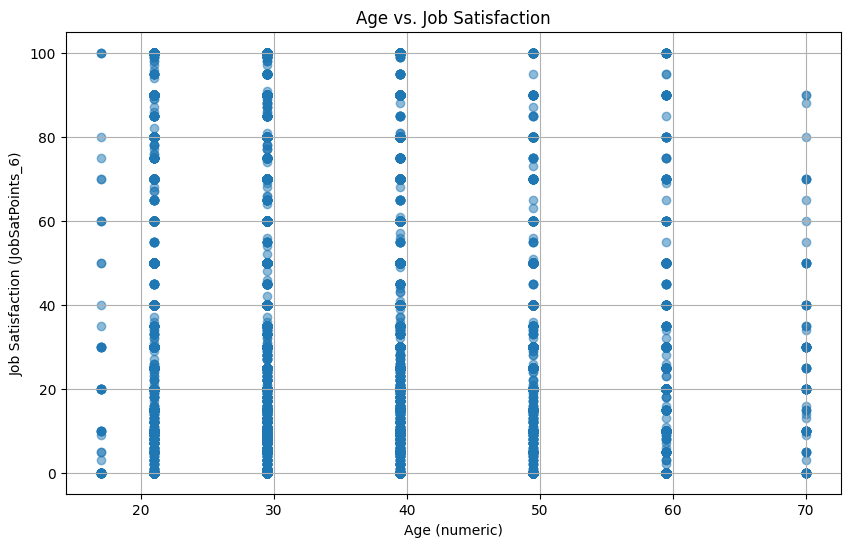

In [16]:
## Write your code here
# 1. Map Age groups to numeric values (average age of each group)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# 2. Create a new numeric Age column
df['Age_num'] = df['Age'].map(age_mapping)

# 3. Keep only rows without NaN in both Age_num and JobSatPoints_6
plot_data = df.dropna(subset=['Age','JobSatPoints_6'])

# 4. Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(plot_data['Age_num'], plot_data['JobSatPoints_6'], alpha=0.5)
plt.xlabel('Age (numeric)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Age vs. Job Satisfaction')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


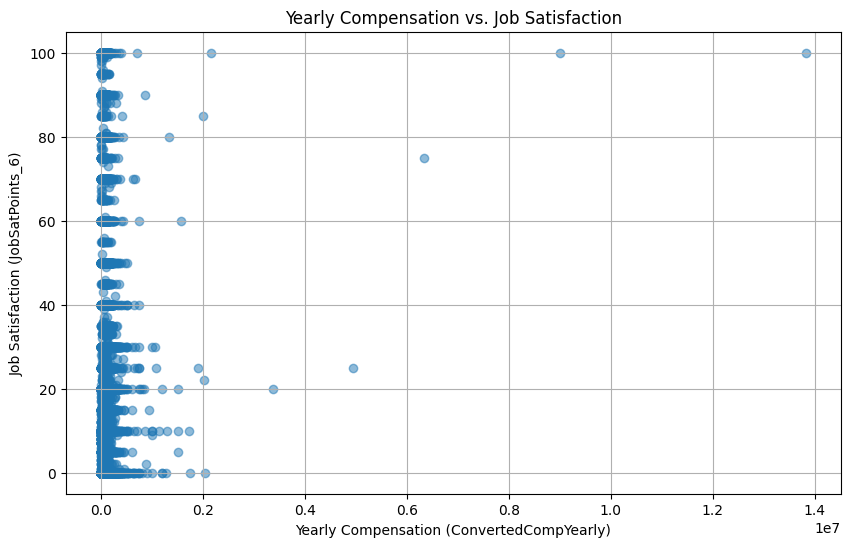

In [18]:
## Write your code here
# Keep only rows without NaN in both ConvertedCompYearly and JobSatPoints_6
plot_data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['ConvertedCompYearly'], plot_data['JobSatPoints_6'], alpha=0.5)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Yearly Compensation vs. Job Satisfaction')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


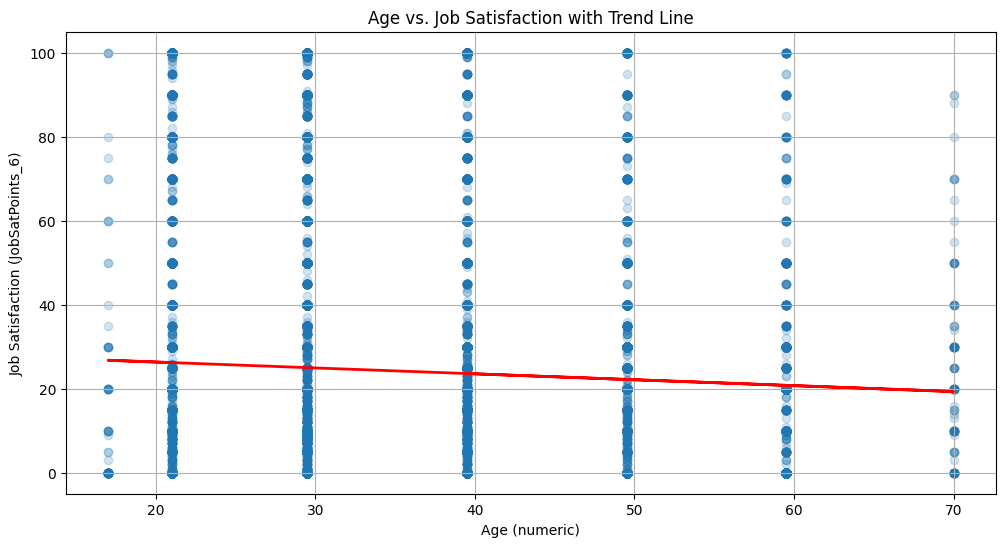

In [23]:
## Write your code here
import numpy as np
# Mapping for Age column (text → numeric values)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Create numeric Age column
df['Age_num'] = df['Age'].map(age_mapping)

# Keep only rows without NaN
plot_data = df.dropna(subset=['Age_num', 'JobSatPoints_6'])

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(
    plot_data['Age_num'], 
    plot_data['JobSatPoints_6'], 
    alpha=0.2  # same as scatter_kws alpha
)

# Regression line (linear)
m, b = np.polyfit(plot_data['Age_num'], plot_data['JobSatPoints_6'], 1)
plt.plot(
    plot_data['Age_num'], 
    m * plot_data['Age_num'] + b, 
    color='red', 
    linewidth=2  # same as line_kws
)

# Labels
plt.xlabel('Age (numeric)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Age vs. Job Satisfaction with Trend Line')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


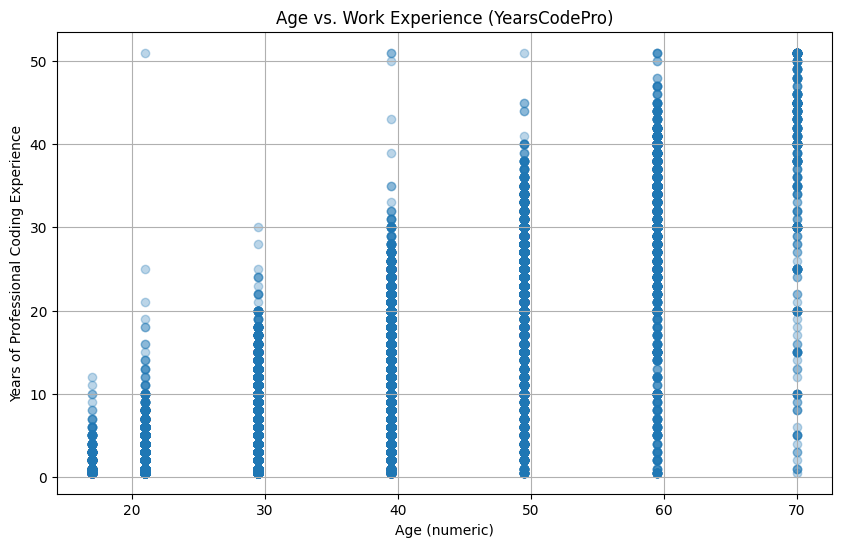

In [25]:
## Write your code here
# Age mapping (text → numeric)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_mapping)

# YearsCodePro mapping
def map_years_code_pro(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(map_years_code_pro)

# Drop NaNs
plot_data = df.dropna(subset=['Age_num', 'YearsCodePro_num'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_data['Age_num'], 
    plot_data['YearsCodePro_num'], 
    alpha=0.3
)
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Age vs. Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


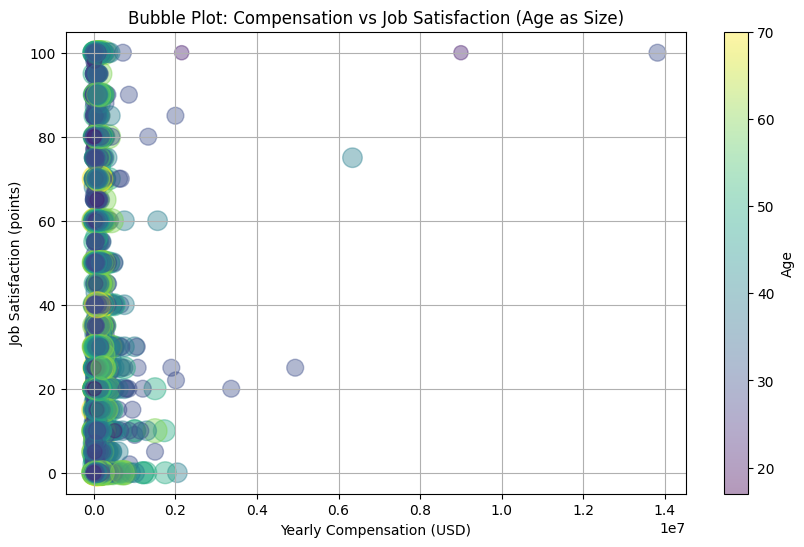

In [29]:
## Write your code here
# Age mapping (text → numeric midpoint)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_mapping)

# Drop NaNs for the 3 needed columns
plot_data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_num'])

# Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_data['ConvertedCompYearly'],
    plot_data['JobSatPoints_6'],
    s=plot_data['Age_num'] * 5,  # bubble size scale
    alpha=0.4,
    c=plot_data['Age_num'],      # color by age
    cmap='viridis'
)

# Labels and title
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (points)")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Age as Size)")
plt.colorbar(label="Age")
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


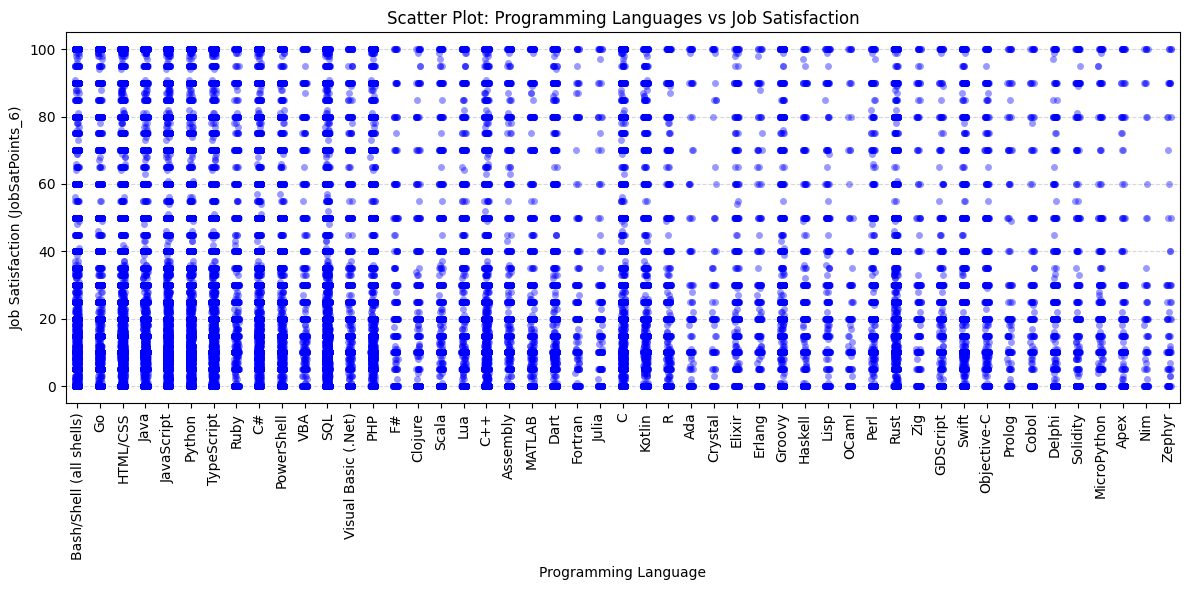

In [32]:
## Write your code here
!pip install seaborn
import seaborn as sns
# Drop rows with missing JobSatPoints_6 or LanguageHaveWorkedWith
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Split by ';' and explode to long format
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Strip spaces
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

# Scatter plot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_exploded,
    x='LanguageHaveWorkedWith',
    y='JobSatPoints_6',
    alpha=0.4,                 # Transparency
    jitter=True,               # Spread points horizontally
    color='blue'
)

plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Scatter Plot: Programming Languages vs Job Satisfaction')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


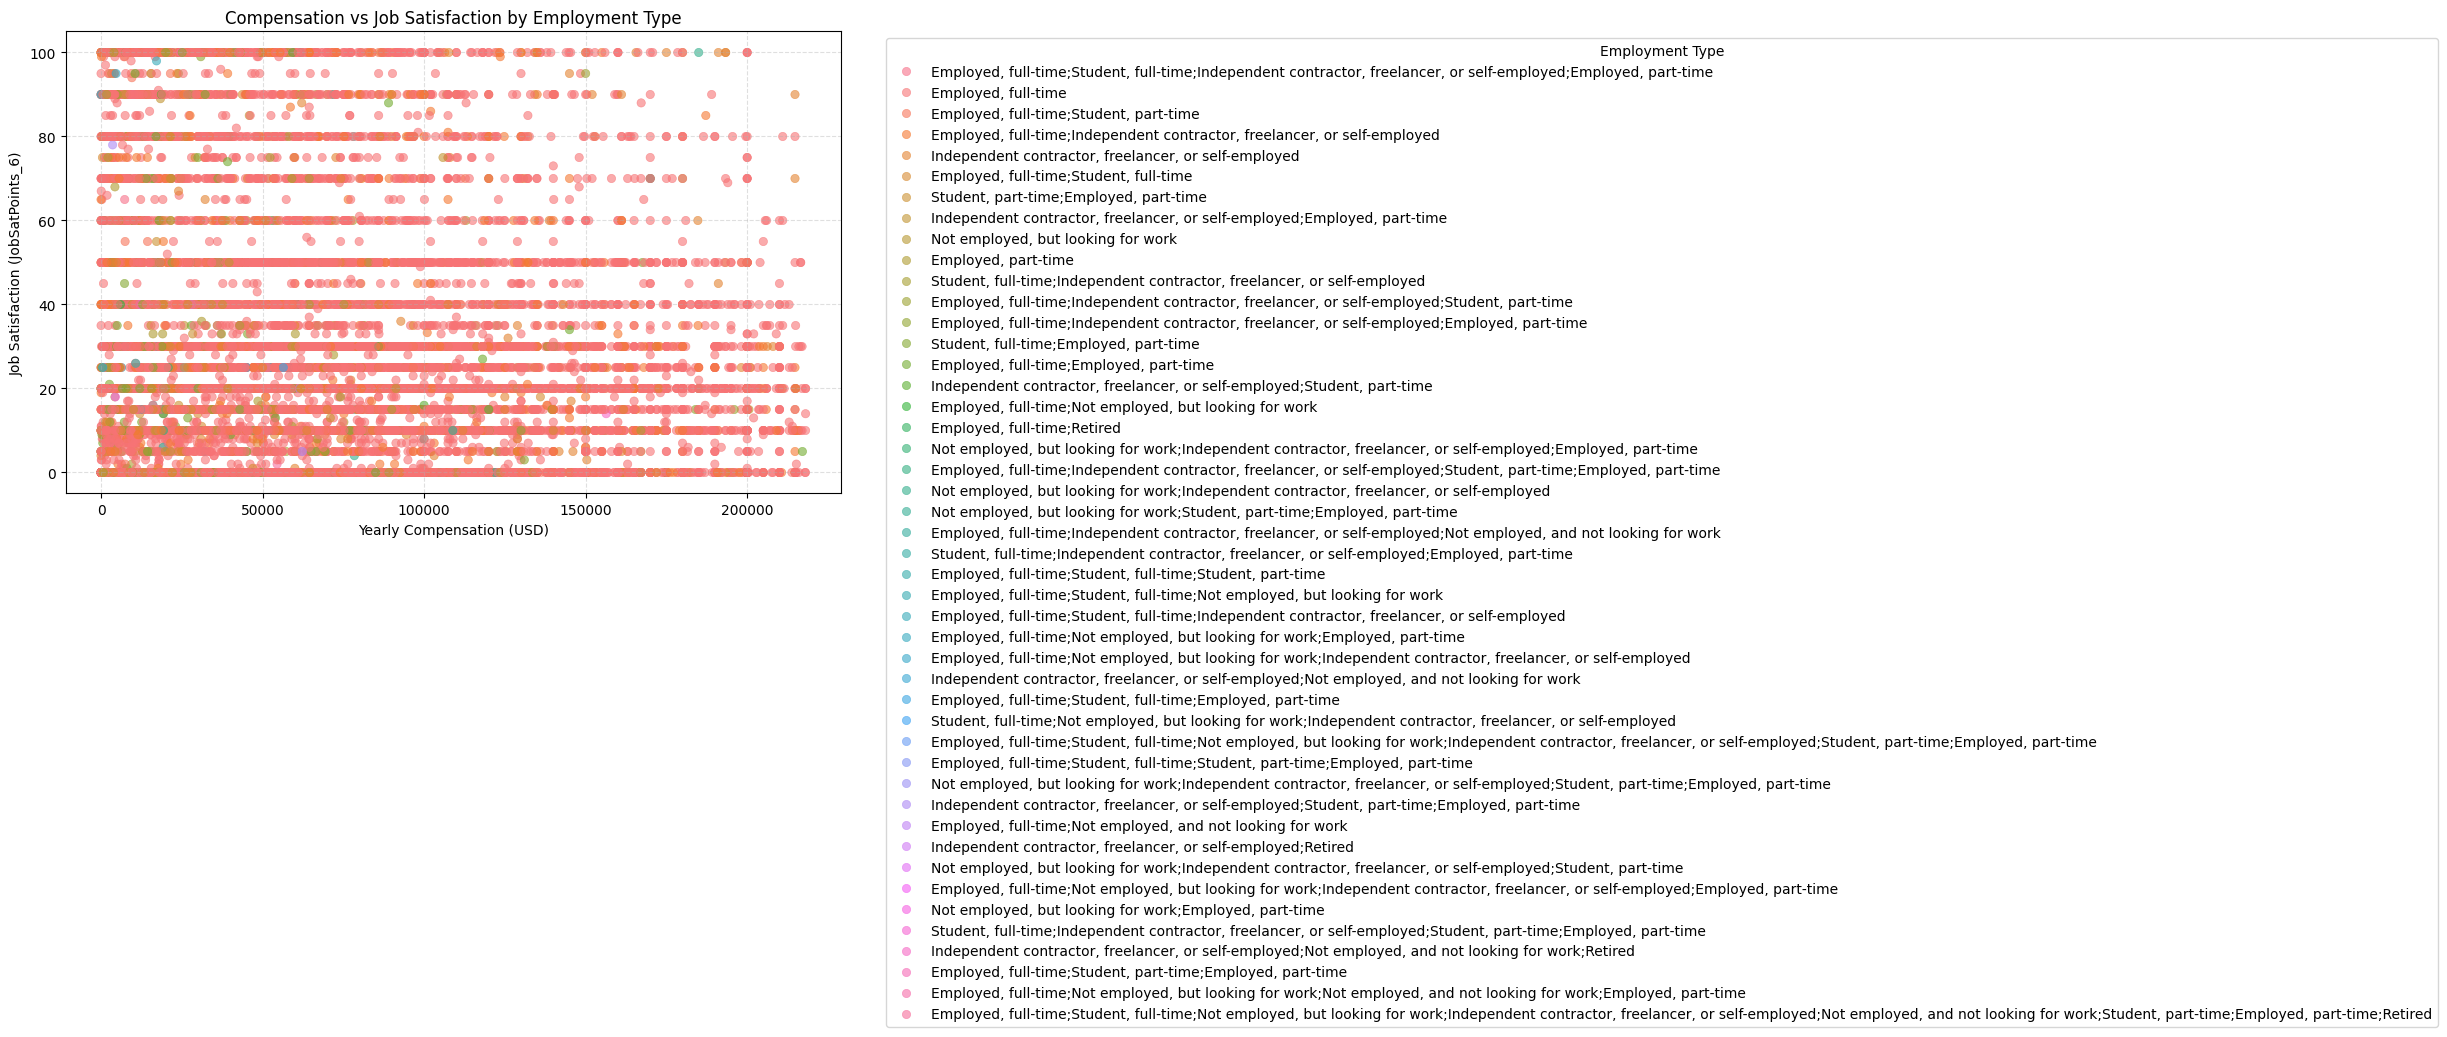

In [34]:
## Write your code here
# Drop rows with missing values in relevant columns
df_emp = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Remove extreme values using IQR
Q1 = df_emp['ConvertedCompYearly'].quantile(0.25)
Q3 = df_emp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_emp = df_emp[(df_emp['ConvertedCompYearly'] >= lower_bound) &
                (df_emp['ConvertedCompYearly'] <= upper_bound)]

# Scatter plot with hue for Employment type
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_emp,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,          # transparency
    edgecolor=None
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
#plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


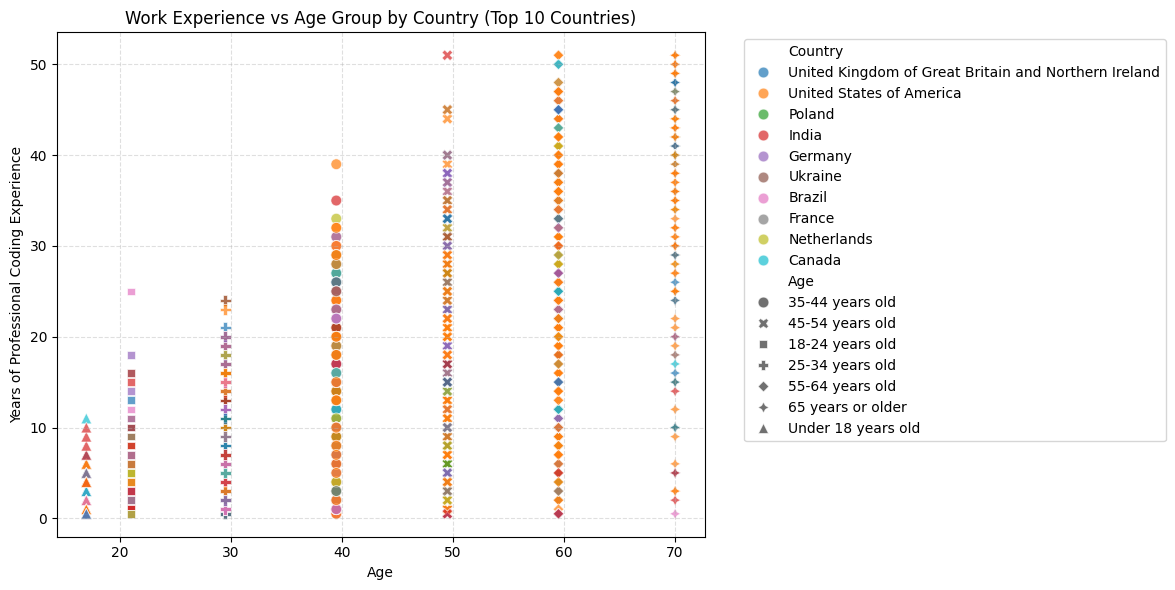

In [36]:
## Write your code here
# Mapping for YearsCodePro
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(years_mapping)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Mapping for Age
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_mapped'] = df['Age'].map(age_mapping)

# Drop rows with missing values
df_clean = df.dropna(subset=['YearsCodePro', 'Age_mapped', 'Country']).copy()

# Optional: keep top 10 countries by count for clarity
top_countries = df_clean['Country'].value_counts().nlargest(10).index
df_plot = df_clean[df_clean['Country'].isin(top_countries)]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x='Age_mapped',
    y='YearsCodePro',
    hue='Country',
    style='Age',             # use original Age category as marker
    alpha=0.7,
    s=60                     # size of points
)

plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs Age Group by Country (Top 10 Countries)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
